In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [2]:
df_bank=pd.read_csv('bank-full.csv', sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
lista_numericas=['age','balance','duration','day','pdays','previous','campaign']

In [8]:
lista_categoricas=['job','marital','education','contact','month','poutcome']

In [9]:
categoricas_binarias = ['default','housing','loan','y']

In [10]:
## Cambiamos las variables binarias a si/no

for j in categoricas_binarias:
    df_bank[j] = [0 if x == 'no' else 1 for x in df_bank[j]]

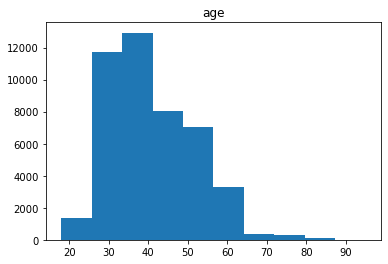

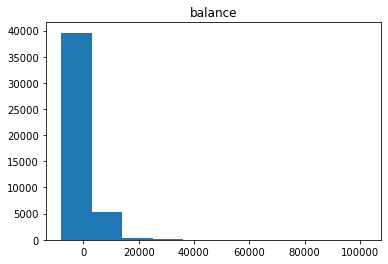

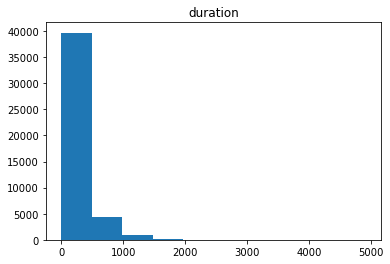

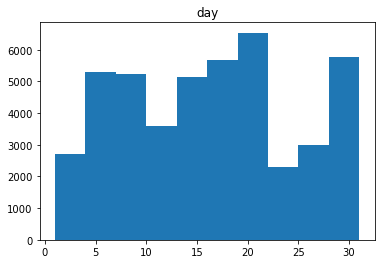

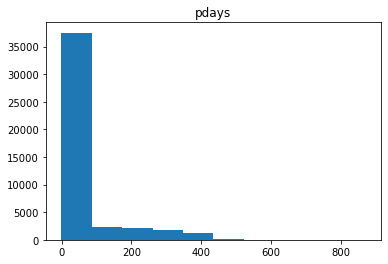

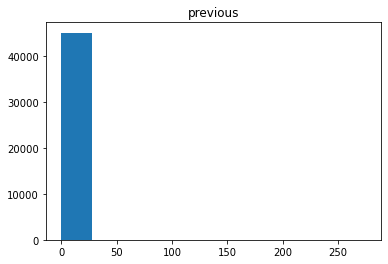

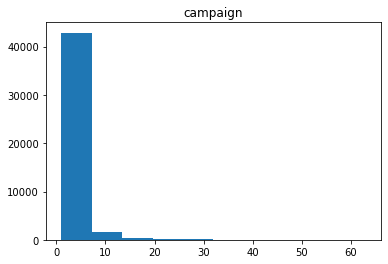

In [11]:
for l in lista_numericas:
    plt.hist(df_bank[l])
    plt.title(l)
    plt.show()

In [12]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Preprocesado rápido

In [13]:
## Transformamos las variables a dummies
for k in lista_categoricas:
    dummies = pd.get_dummies(df_bank[k],prefix=k)
    df_bank = pd.concat([df_bank, dummies], axis=1)

In [14]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [15]:
le = LabelEncoder()

In [16]:
## También a numéricas
df_bank.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                      (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

df_bank.education.replace(('primary','secondary','tertiary','unknown'),
                      (1,2,3,4),inplace=True)

df_bank.marital.replace(('married','single','divorced'),
                      (1,2,3),inplace=True)

df_bank.contact.replace(('cellular','unknown','telephone'),
                      (1,2,3),inplace=True)

df_bank.poutcome.replace(('failure','unknown','other','success'),
                      (1,2,3,4),inplace=True)

In [17]:
le.fit(df_bank.job.unique())
le.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [18]:
df_bank.job.head()

0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object

In [19]:
le.transform(df_bank.job)

array([4, 9, 2, ..., 5, 1, 2])

In [20]:
df_bank.job = le.transform(df_bank.job)

In [21]:
df_bank.job.head()

0     4
1     9
2     2
3     1
4    11
Name: job, dtype: int32

In [22]:
corr = abs(df_bank.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient()

,y
y,1.000000
duration,0.394521
poutcome_success,0.306788
poutcome,0.213476
poutcome_unknown,0.167051
contact_unknown,0.150935
housing,0.139173
contact_cellular,0.135873
month_mar,0.129456
month_oct,0.128531


### Muestreo estratificado

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('y',axis=1),
                                                    df_bank.y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = df_bank.y)

### Modelos

In [24]:
model1 = RandomForestClassifier().fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [25]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

matriz de confusión
[[7788  197]
 [ 635  423]]
accuracy
0.907995134358067
precision
0.682258064516129
recall
0.3998109640831758
f1
0.5041716328963051
AUC
0.6875698527366411


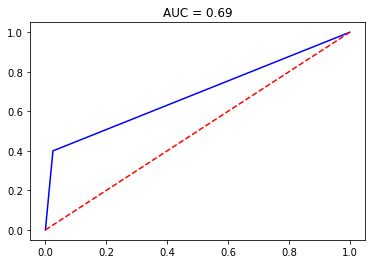

In [26]:
saca_metricas(y_test, y_pred)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.68      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.90      0.91      0.90      9043



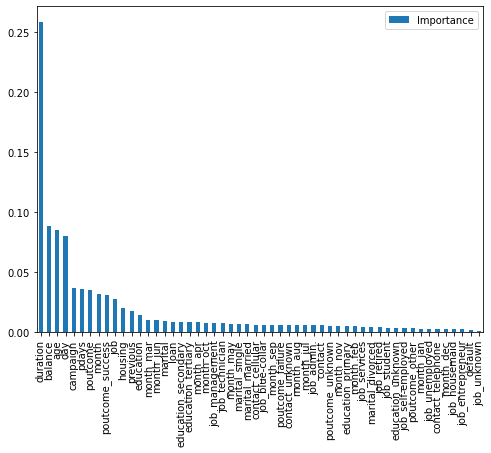

In [28]:
feat_importances = pd.DataFrame(model1.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [29]:
feat_importances

,Importance
duration,0.258766
balance,0.088273
age,0.085432
day,0.080643
campaign,0.037062
pdays,0.035833
poutcome,0.035295
month,0.031834
poutcome_success,0.031082
job,0.027439


### Feature Engineering

In [30]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None)    


<ipython-input-30-413cdf134b00>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-30-413cdf134b00>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-30-413cdf134b00>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-30-413c

<ipython-input-30-413cdf134b00>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-30-413cdf134b00>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-30-413cdf134b00>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-30-413c

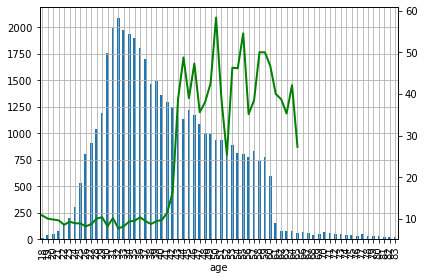

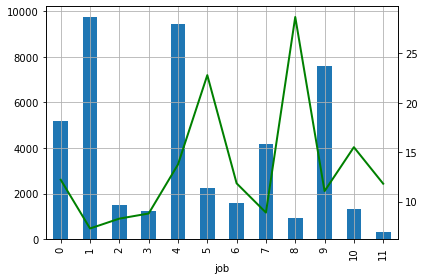

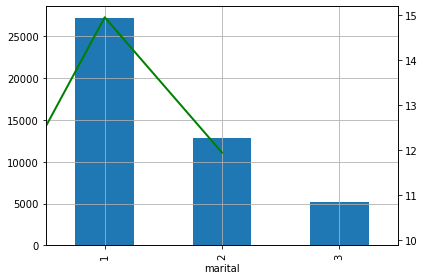

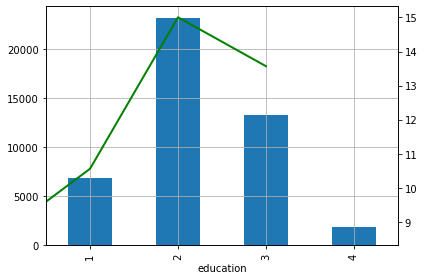

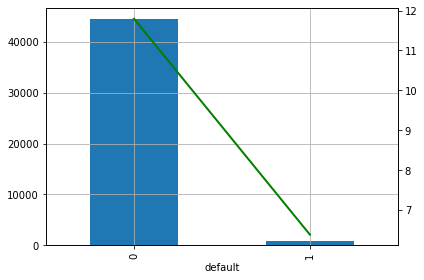

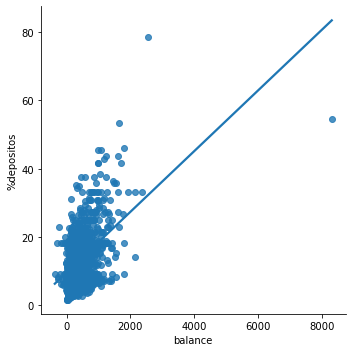

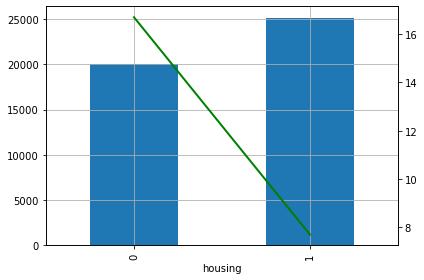

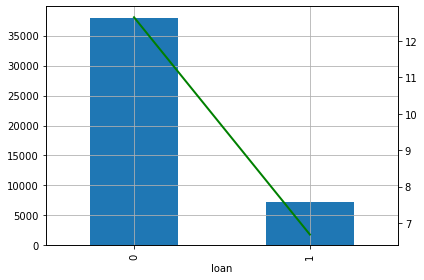

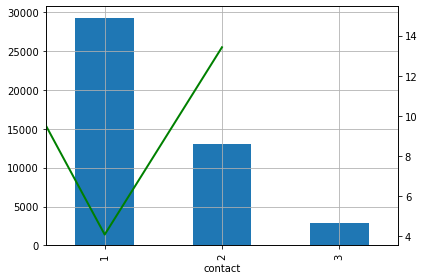

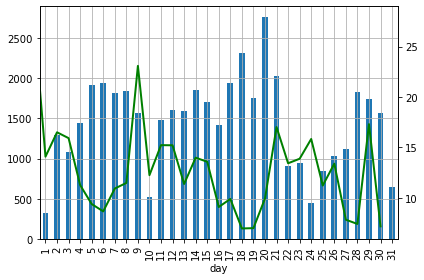

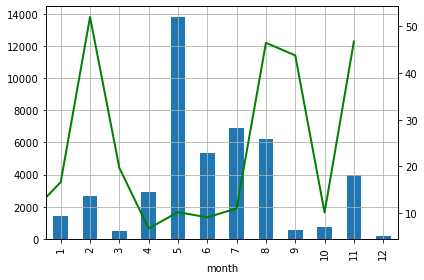

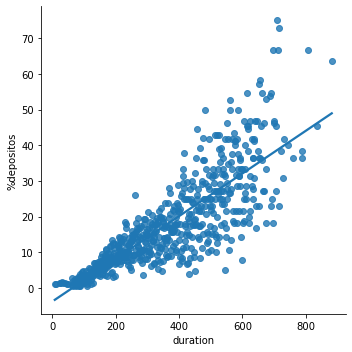

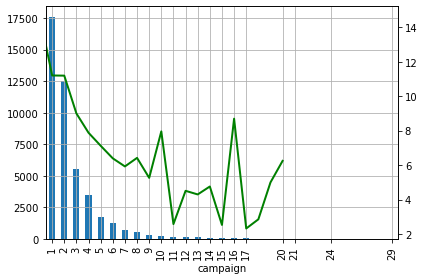

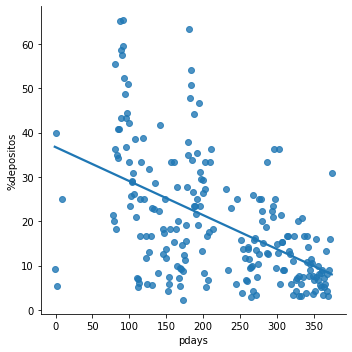

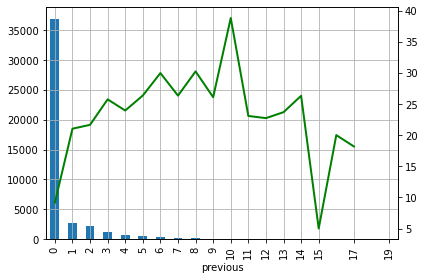

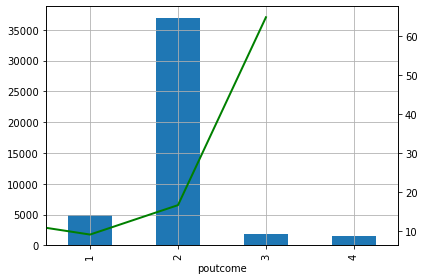

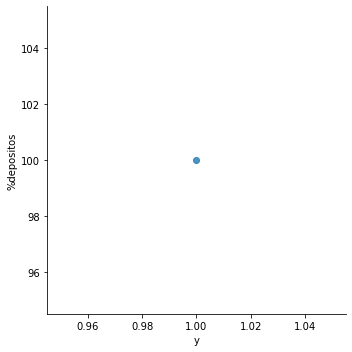

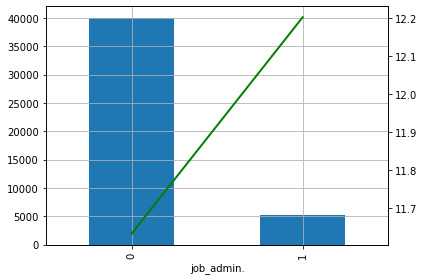

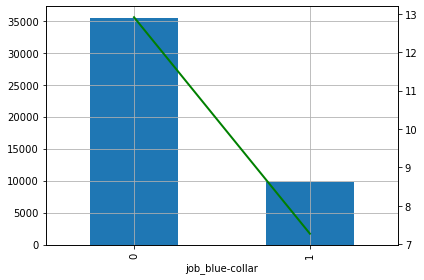

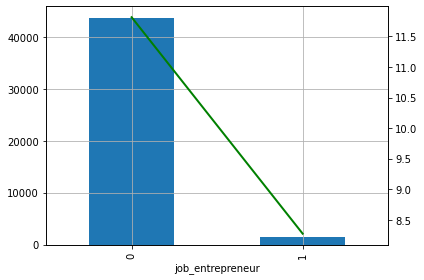

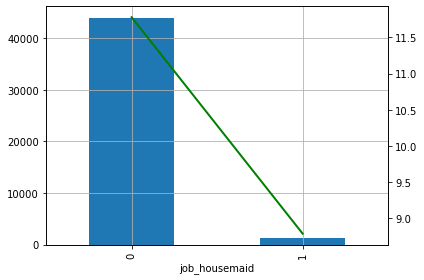

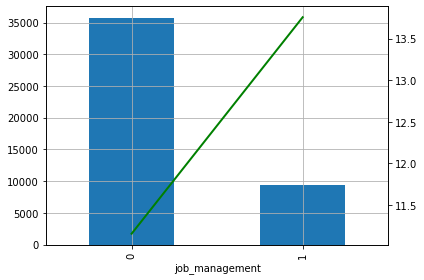

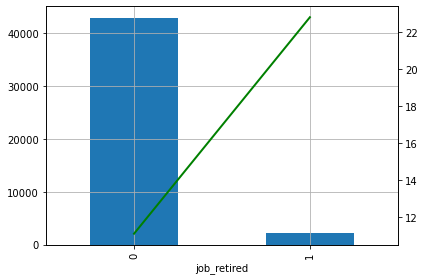

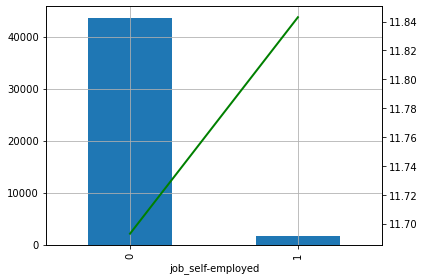

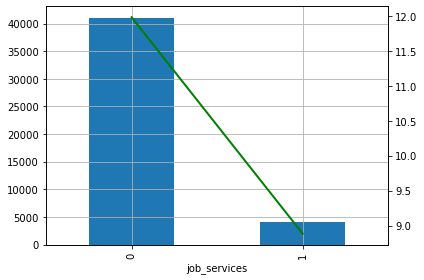

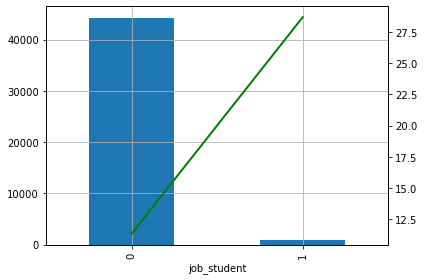

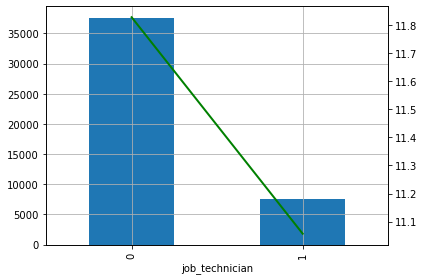

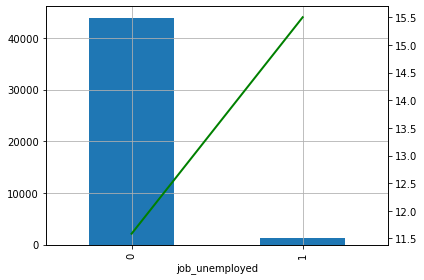

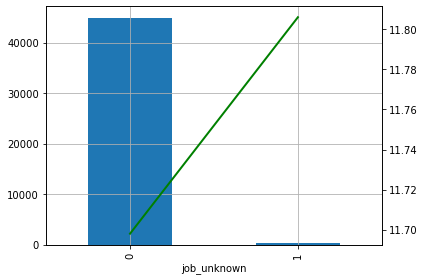

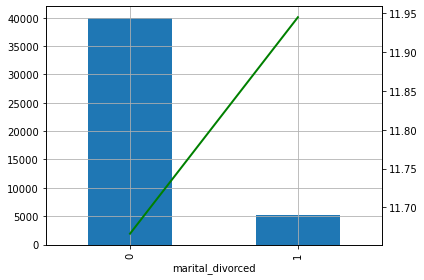

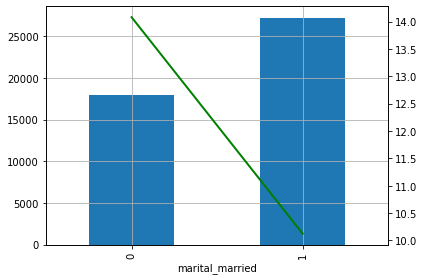

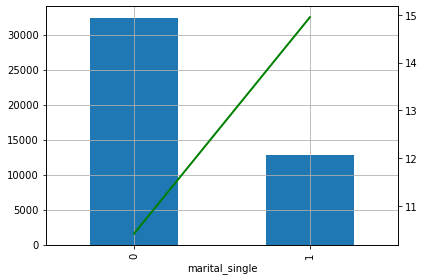

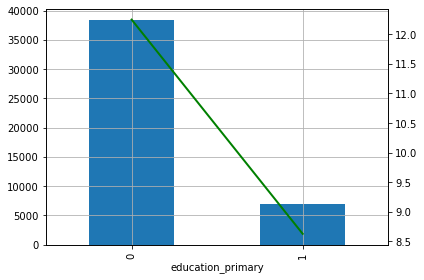

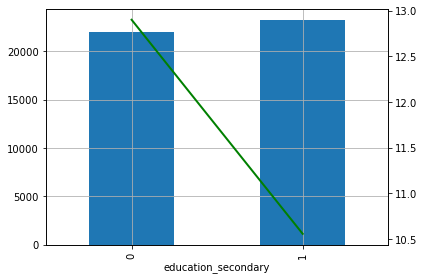

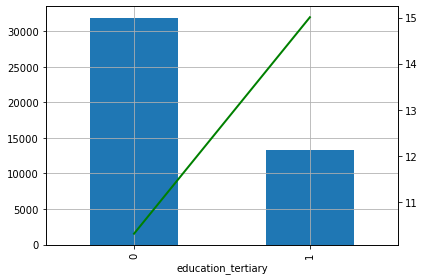

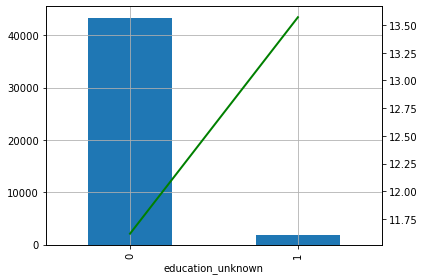

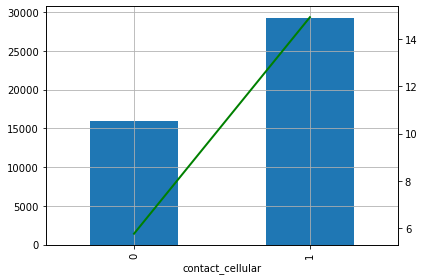

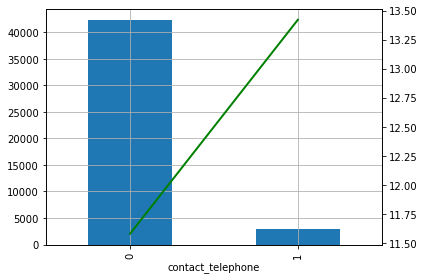

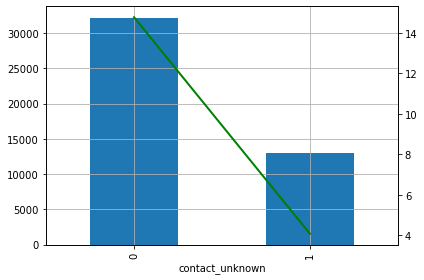

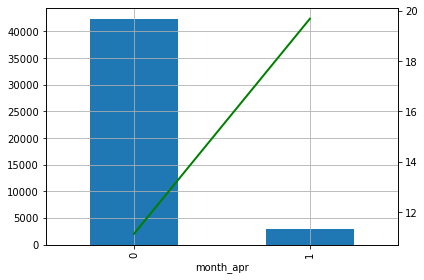

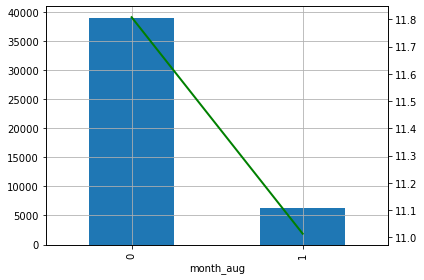

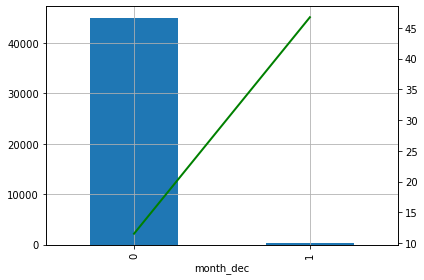

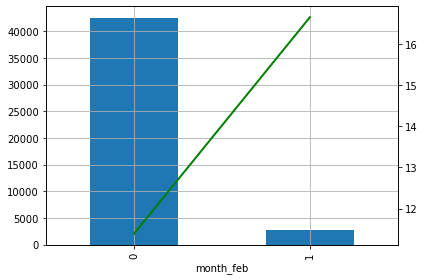

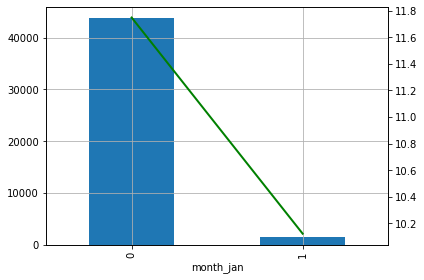

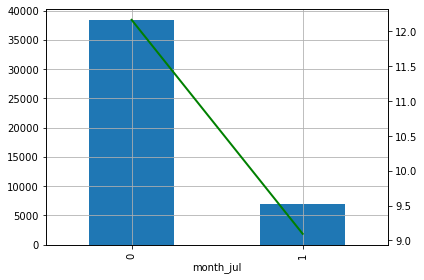

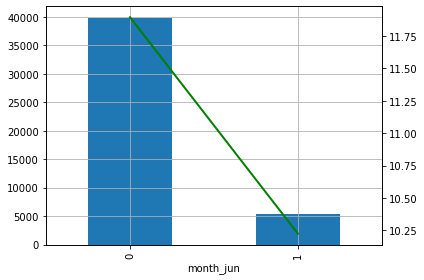

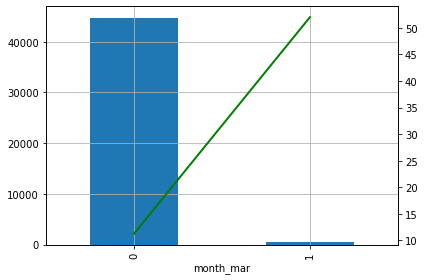

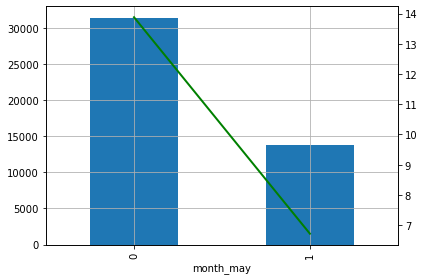

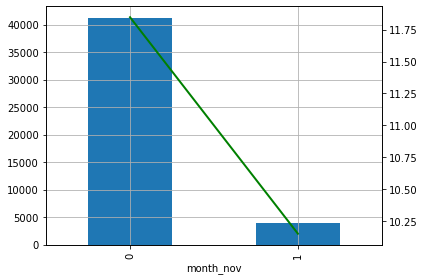

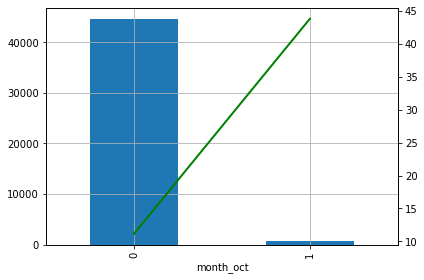

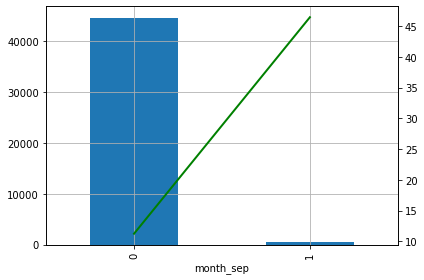

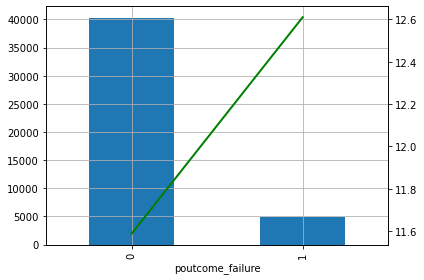

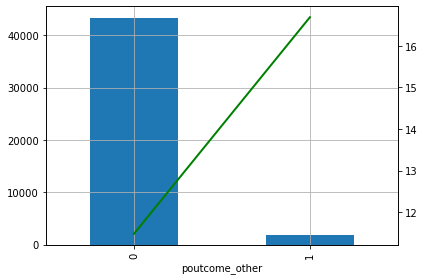

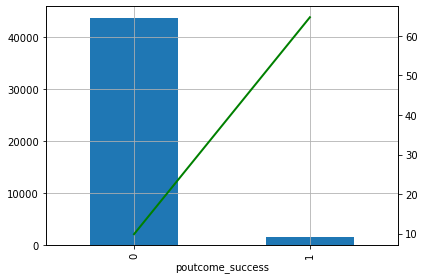

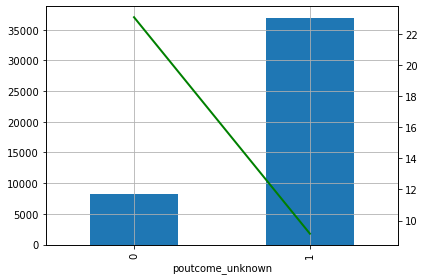

In [31]:
for i in df_bank.columns:
    proporciones_final (i, 'y', df_bank)

In [32]:
def tramos(varib,varib_destino,tamanio,maximo,df):
    df[varib_destino]=np.where(df[varib]==0,-1,(df[varib]//tamanio)*tamanio)
    df[varib_destino]=np.where(df[varib_destino]>=maximo,maximo,df[varib_destino])

In [33]:
## AGE (realizamos una variable con 3 rangos de edad y 3 variables con esos mismos rangos)
df_bank['age_joven'] = df_bank['age'].apply(lambda x: 1 if x<=35 else 0)
df_bank['age_adulto'] = df_bank['age'].apply(lambda x: 1 if x>35 & x<60 else 0)
df_bank['age_jubilado'] = df_bank['age'].apply(lambda x: 1 if x>60 else 0)
df_bank['age_new'] = df_bank['age'].apply(lambda x: 0 if x<=35 else (1 if x>35 and x<60 else(2)))  

In [34]:
corr = abs(df_bank.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient()

,y
y,1.000000
duration,0.394521
poutcome_success,0.306788
poutcome,0.213476
poutcome_unknown,0.167051
age_jubilado,0.156184
contact_unknown,0.150935
housing,0.139173
contact_cellular,0.135873
month_mar,0.129456


In [35]:
tramos('duration','duration_new',5,5000,df_bank) 
df_bank['duration_new'] = df_bank['duration_new'].apply(lambda x: 0 if x<=0 else x)
df_bank['duration_new2'] = df_bank['duration_new']//60

In [36]:
corr = abs(df_bank.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient()

,y
y,1.000000
duration_new,0.394545
duration,0.394521
duration_new2,0.393241
poutcome_success,0.306788
poutcome,0.213476
poutcome_unknown,0.167051
age_jubilado,0.156184
contact_unknown,0.150935
housing,0.139173


Creamos diferentes variables por rangos para intentar mejorar el modelo

In [37]:
## CAMPAIGN (observamos que la mitad de los datos están entre 1 y 2, creamos una nueva clase para el resto)
df_bank['campaign_new'] = df_bank['campaign'].apply(lambda x: 0 if x<=15 else 1)
df_bank['campaign_new2'] = df_bank['campaign'].apply(lambda x: 1 if x==1 else (2 if x==2 else(3))) 

## DURATION (en este caso, hacemos tramos de la variable para conseguir una mayor continuidad)
tramos('duration','duration_new',5,5000,df_bank) 
df_bank['duration_new'] = df_bank['duration_new'].apply(lambda x: 0 if x<=0 else x)
df_bank['duration_new2'] = df_bank['duration_new']//60

## PDAYS (casi todos los datos están en -1 (no contactado), por tanto, transformamos la variable en contactados y no contactados)
df_bank['pdays_new5'] = df_bank['pdays'].apply(lambda x: 0 if x<=0 else (1 if x<7 else(2 if x>=7 and x<14 else(3))))
df_bank['pdays_new'] = df_bank['pdays'].apply(lambda x: 0 if x==-1 else x)
df_bank['pdays_new2'] = df_bank['pdays']//30
df_bank['pdays'] = df_bank['pdays'].apply(lambda x: 0 if x==-1 else x)
df_bank['pdays_new2'] = df_bank['pdays_new2'].apply(lambda x: 0 if x==-1 else x)
tramos('pdays_new2','pdays_new3',2,14,df_bank) 
df_bank['pdays_new3'] = df_bank['pdays_new3'].apply(lambda x: 0 if x<=0 else x)

## PREVIOUS (al igual que anteriormente, la mayoría no han sido contactados anteriormente, creamos una variable binaria)
df_bank['previous_new'] = df_bank['previous'].apply(lambda x: 0 if x == 0 else 1)
df_bank['previous_new_2'] = df_bank['previous'].apply(lambda x: 0 if x == 0 else 1)
tramos('previous','previous_new_2',2,10,df_bank) 
df_bank['previous_new_2'] = df_bank['previous_new_2'].apply(lambda x: 0 if x<=0 else x)

## BALANCE (en este caso, hacemos tramos de la variable)    
tramos('balance','balance_new',500,100000,df_bank)
df_bank['balance_new'] = df_bank['balance_new'].apply(lambda x: 0 if x<=0 else x)
df_bank['balance_negativo'] = df_bank['balance'].apply(lambda x: 1 if x<=0 else 0)
df_bank['balance_new2'] = df_bank['balance'].apply(lambda x: 0 if x<=100 else (1 if x>100 and x<=500 else(2 if x>500 and x<=2000 else(3 if x>2000 and x<10000 else(4)))))
df_bank['balance'] = df_bank['balance'].apply(lambda x: 0 if x<=0 else x)

## DAY (en este caso podemos crear una variable que calcule la quincena)
tramos('day','day_new',15,31,df_bank)

## JOB (podemos hacer una variable de empleado y no empleado)
df_bank['job_new'] = df_bank['job'].apply(lambda x: 0 if x==11 or x ==6 or x==9  else 1)

In [38]:
corr = abs(df_bank.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient()

,y
y,1.000000
duration_new,0.394545
duration,0.394521
duration_new2,0.393241
poutcome_success,0.306788
poutcome,0.213476
pdays_new5,0.167930
previous_new,0.167263
poutcome_unknown,0.167051
age_jubilado,0.156184


In [39]:
list(corr[['y']].sort_values(by = 'y',ascending = False).index)

['y',
 'duration_new',
 'duration',
 'duration_new2',
 'poutcome_success',
 'poutcome',
 'pdays_new5',
 'previous_new',
 'poutcome_unknown',
 'age_jubilado',
 'contact_unknown',
 'housing',
 'contact_cellular',
 'month_mar',
 'month_oct',
 'month_sep',
 'previous_new_2',
 'pdays',
 'pdays_new',
 'month_may',
 'pdays_new2',
 'contact',
 'balance_new2',
 'pdays_new3',
 'previous',
 'job_retired',
 'campaign_new2',
 'job_student',
 'month_dec',
 'campaign',
 'job_blue-collar',
 'loan',
 'education_tertiary',
 'education',
 'balance_negativo',
 'month_apr',
 'marital_single',
 'marital_married',
 'balance',
 'balance_new',
 'marital',
 'job',
 'education_primary',
 'month_feb',
 'education_secondary',
 'month_jul',
 'job_management',
 'poutcome_other',
 'campaign_new',
 'age_joven',
 'day',
 'job_services',
 'age',
 'age_new',
 'default',
 'day_new',
 'job_unemployed',
 'job_entrepreneur',
 'month',
 'month_jun',
 'age_adulto',
 'job_housemaid',
 'month_nov',
 'contact_telephone',
 'educat

### Selección de variables

In [40]:
final_features = ['duration_new',
 'poutcome_success',
 'pdays_new5',
 'previous_new',
 'poutcome_unknown',
 'age_jubilado',
 'contact_unknown',
 'housing',
 'contact_cellular',
 'month_mar',
 'month_oct',
 'job_retired',
 'campaign_new2',
 'job_student',
 'job_blue-collar',
 'loan',
 'education_tertiary',
 'balance_negativo',
 'marital']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('y',axis=1),
                                                    df_bank.y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = df_bank.y)

In [42]:
model2 = RandomForestClassifier().fit(X_train,y_train)
y_pred = model2.predict(X_test)

matriz de confusión
[[7747  238]
 [ 607  451]]
accuracy
0.9065575583324118
precision
0.6545718432510885
recall
0.42627599243856334
f1
0.5163136805953064
AUC
0.6982350532011227


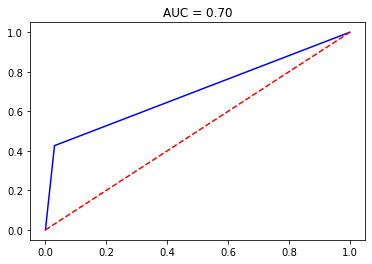

In [43]:
saca_metricas(y_test, y_pred)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.65      0.43      0.52      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.70      0.73      9043
weighted avg       0.90      0.91      0.90      9043



### Tuneo de hiperparámetros

In [56]:
grid_param = {
    'n_estimators': [30, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [20,22,24]
}

In [57]:
model_grid = GridSearchCV(estimator=model2,
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

In [58]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 22, 24],
                         'n_estimators': [30, 50, 100, 200]},
             scoring='f1')

In [59]:
print(model_grid.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 22, 'n_estimators': 100}


In [60]:
print(model_grid.best_score_)

0.5288123456821685


In [62]:
model3 = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=22, n_estimators=100).fit(X_train,y_train)
y_pred = model3.predict(X_test)

matriz de confusión
[[7733  252]
 [ 586  472]]
accuracy
0.9073316377308416
precision
0.6519337016574586
recall
0.44612476370510395
f1
0.5297418630751964
AUC
0.7072827951274424


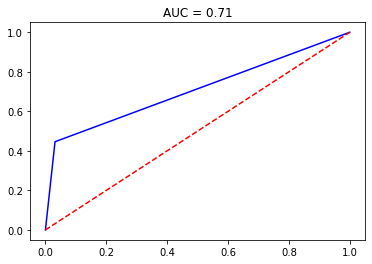

In [63]:
saca_metricas(y_test, y_pred)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.65      0.45      0.53      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.71      0.74      9043
weighted avg       0.90      0.91      0.90      9043



### Balanceo de datos

In [66]:
print("Before OverSampling, counts of label '1': {}".format(sum(df_bank.y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(df_bank.y==0)))

sm = SMOTE(random_state=2,sampling_strategy=0.4)
df_bank_res, y_bank_res = sm.fit_resample(df_bank.drop('y',axis=1), df_bank.y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(df_bank_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_bank_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_bank_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_bank_res==0)))

Before OverSampling, counts of label '1': 5289
Before OverSampling, counts of label '0': 39922 

After OverSampling, the shape of train_X: (55890, 73)
After OverSampling, the shape of train_y: (55890,) 

After OverSampling, counts of label '1': 15968
After OverSampling, counts of label '0': 39922


In [67]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(df_bank_res,
                                                    y_bank_res,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y_bank_res)

In [72]:
model4 = RandomForestClassifier().fit(X_train_res,y_train_res)
y_pred_res = model4.predict(X_test_res)

matriz de confusión
[[7668  316]
 [ 501 2693]]
accuracy
0.9269100017892289
precision
0.8949817215021602
recall
0.843143393863494
f1
0.8682895373206513
AUC
0.9017821177734304


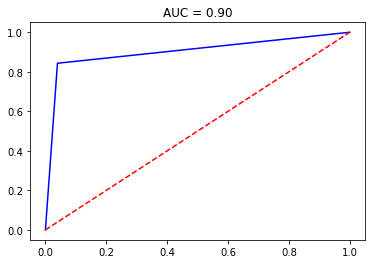

In [73]:
saca_metricas(y_test_res, y_pred_res)

In [74]:
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7984
           1       0.90      0.85      0.87      3194

    accuracy                           0.93     11178
   macro avg       0.92      0.90      0.91     11178
weighted avg       0.93      0.93      0.93     11178



In [75]:
results = cross_val_score(estimator=model4, X=X_train_res, y=y_train_res, cv=5)

In [76]:
results

array([0.9264229 , 0.92418651, 0.92742116, 0.9222769 , 0.92708566])

In [77]:
print(results.mean())

0.9254786264948516


In [78]:
print(results.std())

0.00195797270322152


### Automatización

In [45]:
from sklearn.pipeline import Pipeline

In [62]:
pipe_dt = Pipeline([('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('RF',RandomForestClassifier(random_state=42))])

In [63]:
param_range = [1, 2, 3, 4, 5, 6]

In [64]:
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]

In [65]:
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='f1',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='f1',
        cv=3)

In [91]:
grids = [dt_grid_search, rf_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)
    print('Model:{}'.format(pipe.estimator[0]))
    print('Score: {}'.format(pipe.best_score_))
    print('Params: {}'.format(pipe.best_params_))

Model:DecisionTreeClassifier(random_state=42)
Score: 0.49117329572742835
Params: {'DT__criterion': 'entropy', 'DT__max_depth': 2, 'DT__min_samples_leaf': 1, 'DT__min_samples_split': 2}
Model:RandomForestClassifier(random_state=42)
Score: 0.38953833267753196
Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 3}
